In [105]:
import warnings
warnings.filterwarnings("ignore")

In [106]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [107]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
import seaborn as sns
import matplotlib.pyplot as plt



In [108]:
tensorflow.__version__

'2.15.0'

Part1.1a-Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
signalData=pd.read_csv('/content/drive/MyDrive/Python Course/Signal.csv')

In [111]:
signalData.shape

(1599, 12)

In [112]:
signalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Part1.1b -Check for missing values and print percentage for each attribute

In [113]:
signalData.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [114]:
missing_values = signalData.isnull().sum()

# Calculate percentage of missing values
percentage_missing = (missing_values / len(signalData)) * 100

# Combine missing values and percentage into a new DataFrame
missing_data = pd.DataFrame({'Missing_Values': missing_values, 'Percentage': percentage_missing})

# Print the result
print(missing_data)

                 Missing_Values  Percentage
Parameter 1                   0         0.0
Parameter 2                   0         0.0
Parameter 3                   0         0.0
Parameter 4                   0         0.0
Parameter 5                   0         0.0
Parameter 6                   0         0.0
Parameter 7                   0         0.0
Parameter 8                   0         0.0
Parameter 9                   0         0.0
Parameter 10                  0         0.0
Parameter 11                  0         0.0
Signal_Strength               0         0.0


Part1.1c -Check for presence of duplicate records in the dataset and impute with appropriate method

In [115]:
signalData[signalData.duplicated()]


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [116]:
# dropping duplicate values
signalData.drop_duplicates(keep=False,inplace=True)
signalData[signalData.duplicated()]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength


In [117]:
signalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 1 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1139 non-null   float64
 1   Parameter 2      1139 non-null   float64
 2   Parameter 3      1139 non-null   float64
 3   Parameter 4      1139 non-null   float64
 4   Parameter 5      1139 non-null   float64
 5   Parameter 6      1139 non-null   float64
 6   Parameter 7      1139 non-null   float64
 7   Parameter 8      1139 non-null   float64
 8   Parameter 9      1139 non-null   float64
 9   Parameter 10     1139 non-null   float64
 10  Parameter 11     1139 non-null   float64
 11  Signal_Strength  1139 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 115.7 KB


Part1.1d-Visualise distribution of the target variable.

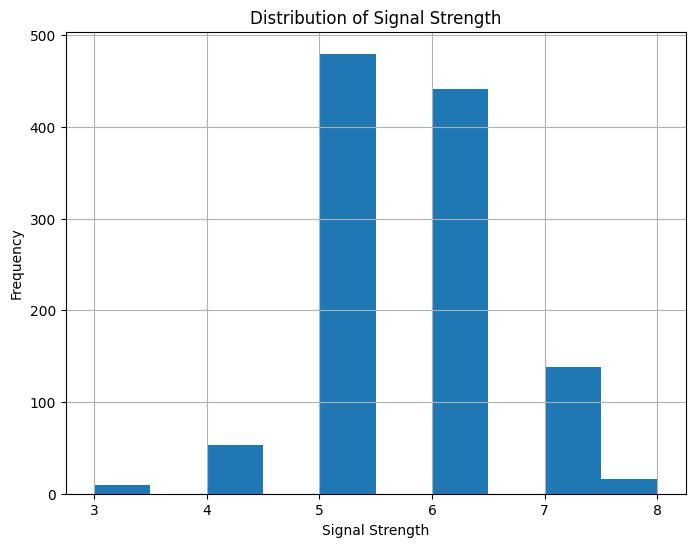

In [118]:
target_variable = signalData['Signal_Strength']

# Plotting the distribution
plt.figure(figsize=(8, 6))
plt.hist(target_variable)
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [119]:
signalData.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1139.0,8.287884,1.725696,4.6000,7.10000,7.90000,9.2000,15.9000
Parameter 2,1139.0,0.531172,0.188279,0.1600,0.39000,0.52000,0.6450,1.5800
Parameter 3,1139.0,0.273477,0.196370,0.0000,0.09500,0.26000,0.4300,1.0000
Parameter 4,1139.0,2.493635,1.257423,1.2000,1.90000,2.20000,2.6000,15.5000
Parameter 5,1139.0,0.088897,0.052059,0.0340,0.06900,0.07900,0.0910,0.6110
Parameter 6,1139.0,15.929763,10.392575,1.0000,7.00000,14.00000,21.0000,72.0000
Parameter 7,1139.0,47.152766,33.993453,6.0000,22.00000,38.00000,63.0000,289.0000
Parameter 8,1139.0,0.996648,0.001835,0.9902,0.99554,0.99666,0.9978,1.0032
Parameter 9,1139.0,3.308903,0.155179,2.7400,3.21000,3.31000,3.4000,4.0100
Parameter 10,1139.0,0.659306,0.171698,0.3300,0.55000,0.62000,0.7200,2.0000


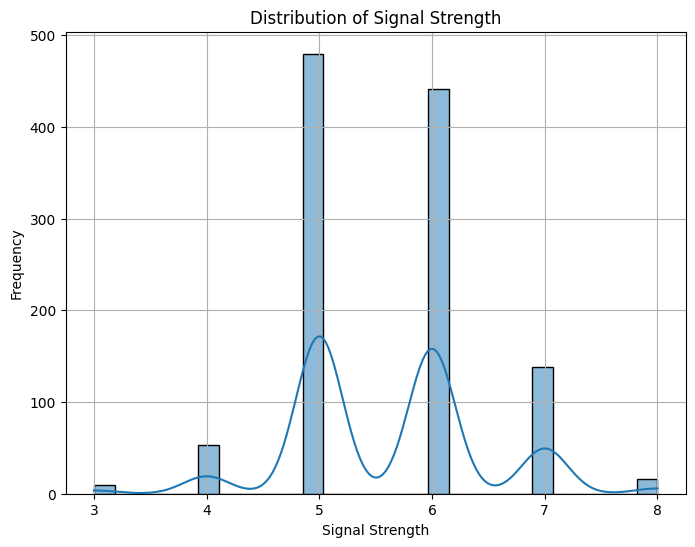

In [120]:
target_variable = signalData['Signal_Strength']

# Plotting the distribution using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(target_variable,  kde=True)
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

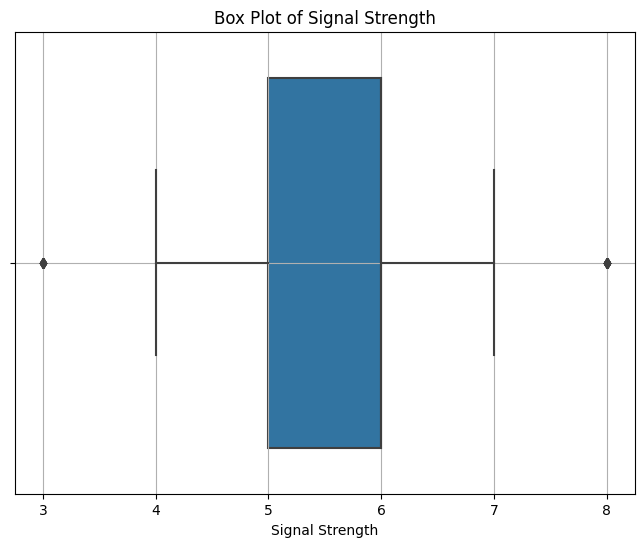

In [121]:
target_variable = signalData['Signal_Strength']

# Plotting a box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=target_variable)
plt.title('Box Plot of Signal Strength')
plt.xlabel('Signal Strength')
plt.grid(True)
plt.show()

Part1.1e--Share insights from the initial data analysis (at least 2).

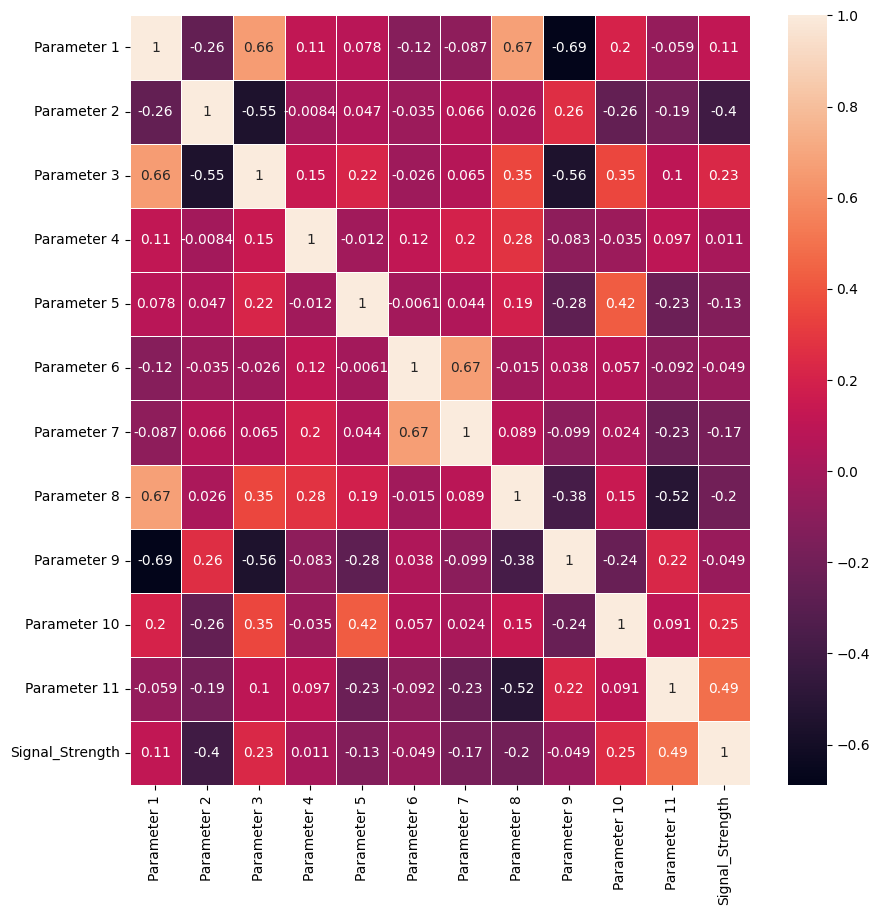

In [122]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(signalData.corr(), annot=True, linewidths=.5, ax=ax);

In [123]:
correlation_matrix = signalData.corr()

# Display the correlation matrix
print(correlation_matrix)

                 Parameter 1  Parameter 2  Parameter 3  Parameter 4  \
Parameter 1         1.000000    -0.255646     0.661276     0.109990   
Parameter 2        -0.255646     1.000000    -0.551735    -0.008420   
Parameter 3         0.661276    -0.551735     1.000000     0.147385   
Parameter 4         0.109990    -0.008420     0.147385     1.000000   
Parameter 5         0.078047     0.047435     0.217638    -0.011715   
Parameter 6        -0.120918    -0.035168    -0.026417     0.115296   
Parameter 7        -0.087440     0.066319     0.065436     0.199609   
Parameter 8         0.674735     0.026450     0.349051     0.277709   
Parameter 9        -0.689535     0.260102    -0.557196    -0.083095   
Parameter 10        0.204315    -0.257381     0.350256    -0.035341   
Parameter 11       -0.059456    -0.193918     0.101647     0.096543   
Signal_Strength     0.110252    -0.404703     0.232096     0.011320   

                 Parameter 5  Parameter 6  Parameter 7  Parameter 8  \
Param

**Insights**

1. Parameters with stronger correlations with Signal_Strength may be more
influential in predicting signal quality. Parameters 2, 7, 9, 10, and 11 seem to have significant correlations.

2. The negative correlation between Parameter 9 and Signal_Strength suggests that as Parameter 9 decreases, signal quality tends to increase.

3. Parameters 1, 3, 8, and 10 are correlated with each other, suggesting potential multicollinearity. It might be worth considering feature selection or dimensionality reduction techniques.

4. Parameters 2, 7, and 9 have notable negative correlations with Signal_Strength.Parameter 11 shows a moderate positive correlation with Signal_Strength.

5. There are potential outliers that may need to be addressed during data preprocessing.

6. Signal strength values range from 3.0 to 8.0, with the majority falling between 5.0 and 6.0.

7. The distribution is moderately spread out around the mean, indicating variability in signal strength.

Part1.2a-Split the data into X & Y

In [124]:
X = signalData.drop(columns='Signal_Strength', axis=1)
X.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4


In [125]:
y = signalData['Signal_Strength']
y

1       5
2       5
3       6
5       5
6       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: Signal_Strength, Length: 1139, dtype: int64

Part 1.2 b -Split the data into train & test with 70:30 proportion

In [126]:
# Import Library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
525,10.4,0.64,0.24,2.8,0.105,29.0,53.0,0.99980,3.24,0.67,9.9
1004,8.2,0.43,0.29,1.6,0.081,27.0,45.0,0.99603,3.25,0.54,10.3
58,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0
1317,9.9,0.44,0.46,2.2,0.091,10.0,41.0,0.99638,3.18,0.69,11.9
894,7.2,0.63,0.03,2.2,0.080,17.0,88.0,0.99745,3.53,0.58,9.8


Part1.2c-Print shape of all the 4 variables and verify if train and test data is in sync.

In [127]:
print('Shape of Train Data of Independent Variables:',X_train.shape)
print('Shape of Train Data of Target Variables:',y_train.shape)
print('Shape of Test Data of Independent Variables:',X_test.shape)
print('Shape of Test Data of Target Variables:',y_test.shape)

Shape of Train Data of Independent Variables: (797, 11)
Shape of Train Data of Target Variables: (797,)
Shape of Test Data of Independent Variables: (342, 11)
Shape of Test Data of Target Variables: (342,)


Train and test data are is in sync

Part1.2d-Normalise the train and test data with appropriate method.

In [128]:
# Import Library
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit & transform train data
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[0.51327434, 0.41025641, 0.30379747, ..., 0.33043478, 0.20606061,
        0.23076923],
       [0.31858407, 0.23076923, 0.36708861, ..., 0.33913043, 0.12727273,
        0.29230769],
       [0.28318584, 0.36752137, 0.2278481 , ..., 0.49565217, 0.15757576,
        0.24615385],
       ...,
       [0.57522124, 0.23931624, 0.53164557, ..., 0.33913043, 0.14545455,
        0.30769231],
       [0.3539823 , 0.26495726, 0.37974684, ..., 0.3826087 , 0.12121212,
        0.15384615],
       [0.23893805, 0.36324786, 0.2278481 , ..., 0.39130435, 0.12727273,
        0.21538462]])

In [129]:
# transform test data
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.34513274, 0.23931624, 0.63291139, ..., 0.13043478, 0.46666667,
        0.15384615],
       [0.24778761, 0.16239316, 0.41772152, ..., 0.43478261, 0.16363636,
        0.53846154],
       [0.48672566, 0.09401709, 0.6835443 , ..., 0.26956522, 0.12121212,
        0.63076923],
       ...,
       [0.21238938, 0.23076923, 0.02531646, ..., 0.42608696, 0.29090909,
        0.33846154],
       [0.20353982, 0.24786325, 0.13924051, ..., 0.3826087 , 0.19393939,
        0.46153846],
       [0.36283186, 0.51709402, 0.27848101, ..., 0.20869565, 0.13333333,
        0.15384615]])

Part1.2e-Transform Labels into format acceptable by Neural Network

In [130]:
# The target variable Signal_Strength has following values
y.unique()

array([5, 6, 7, 4, 8, 3])

In [131]:
# Training target has following unique values
y_train.unique()

array([5, 6, 7, 3, 4, 8])

In [62]:
# convert integers to dummy variables (i.e. one hot encoded)
from tensorflow.keras.utils import to_categorical

dummy_y_train = to_categorical(y_train)
dummy_y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [132]:
print(y_train[1])
print(dummy_y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [133]:
y_test.unique()


array([5, 6, 7, 8, 4, 3])

In [134]:
# Apply the same letter transformation to test target labels
dummy_y_test = to_categorical(y_test)
dummy_y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [135]:
dummy_y_test[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [136]:
X_train_scaled.shape


(797, 11)

Part1.3a-Design a Neural Network to train a classifier

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from tensorflow.keras import optimizers

# Design the NN
classifier = Sequential()

# Input Layer
classifier.add(Dense(activation = 'relu', input_dim = 11, units=10, kernel_initializer='uniform'))

# Add 1st hidden layer
classifier.add(Dense(10, activation='sigmoid', kernel_initializer='uniform'))

# Add output layer
classifier.add(Dense(9, activation = 'softmax', kernel_initializer='uniform'))

# Compile the model
classifier.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Network Summary
classifier.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                120       
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 9)                 99        
                                                                 
Total params: 329 (1.29 KB)
Trainable params: 329 (1.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Part1.3b-Train the classifier using previously designed Architecture

In [138]:
training = classifier.fit(X_train_scaled, dummy_y_train,
               validation_data=(X_test_scaled,dummy_y_test),
               epochs=100, batch_size=32)

Epoch 1/100
25/25 [==============================] - 0s 7ms/step - loss: 2.0885 - accuracy: 0.3864 - val_loss: 1.9962 - val_accuracy: 0.3918
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 1.9243 - accuracy: 0.4141 - val_loss: 1.8510 - val_accuracy: 0.4181
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 1.7943 - accuracy: 0.4228 - val_loss: 1.7373 - val_accuracy: 0.4181
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1.6931 - accuracy: 0.4228 - val_loss: 1.6495 - val_accuracy: 0.4181
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 1.6151 - accuracy: 0.4228 - val_loss: 1.5818 - val_accuracy: 0.4181
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 1.5549 - accuracy: 0.4228 - val_loss: 1.5295 - val_accuracy: 0.4181
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 1.5081 - accuracy: 0.4228 - val_loss: 1.4888 - val_accuracy: 0.4181
Epoch 8/100
2

Part1.3c-Plot 2 separate visuals.

i) Training Loss and Validation Loss

In [139]:
print(training.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


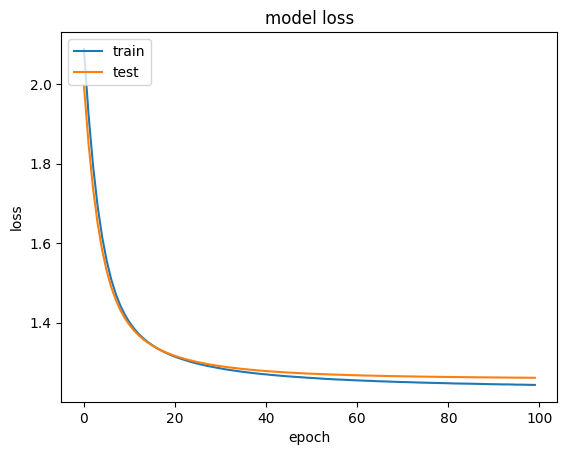

In [140]:
# summarize history for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

ii. Training Accuracy and Validation Accuracy

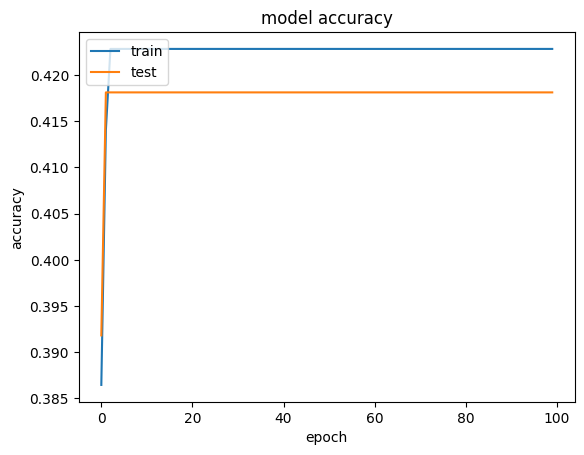

In [141]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Part1.3d -Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [142]:
classifier = Sequential()

# Input Layer
classifier.add(Dense(activation = 'relu', input_dim = 11, units=9, kernel_initializer='he_normal'))

#Normalize the data
classifier.add(tensorflow.keras.layers.BatchNormalization())

# Add dropout
classifier.add(Dropout(0.1))

# Add 1st hidden layer
classifier.add(Dense(9, activation='relu', kernel_initializer='he_normal'))

#Normalize the data
classifier.add(tensorflow.keras.layers.BatchNormalization())

# Add dropout
classifier.add(Dropout(0.1))

# Add output layer
classifier.add(Dense(9, activation = 'softmax', kernel_initializer='uniform'))

# Compile the model
adam_optimizer = tensorflow.keras.optimizers.Adam(lr=0.001)
classifier.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Network Summary
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 9)                 108       
                                                                 
 batch_normalization_6 (Bat  (None, 9)                 36        
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 9)                 0         
                                                                 
 dense_22 (Dense)            (None, 9)                 90        
                                                                 
 batch_normalization_7 (Bat  (None, 9)                 36        
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 9)                

In [143]:
training = classifier.fit(X_train_scaled, dummy_y_train,
               validation_data=(X_test_scaled,dummy_y_test),
               epochs=100, batch_size=32)

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 2.1750 - accuracy: 0.2183 - val_loss: 2.1748 - val_accuracy: 0.1520
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 2.1209 - accuracy: 0.4015 - val_loss: 2.1412 - val_accuracy: 0.4006
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 2.0652 - accuracy: 0.4203 - val_loss: 2.1014 - val_accuracy: 0.4561
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1.9942 - accuracy: 0.4391 - val_loss: 2.0521 - val_accuracy: 0.4591
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 1.9136 - accuracy: 0.4605 - val_loss: 1.9898 - val_accuracy: 0.4912
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1.8327 - accuracy: 0.4630 - val_loss: 1.9136 - val_accuracy: 0.5088
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 1.7504 - accuracy: 0.4668 - val_loss: 1.8267 - val_accuracy: 0.5175
Epoch 8/100
2

Part1.3e -Plot visuals as in Q3.C and share insights about difference observed in both the models

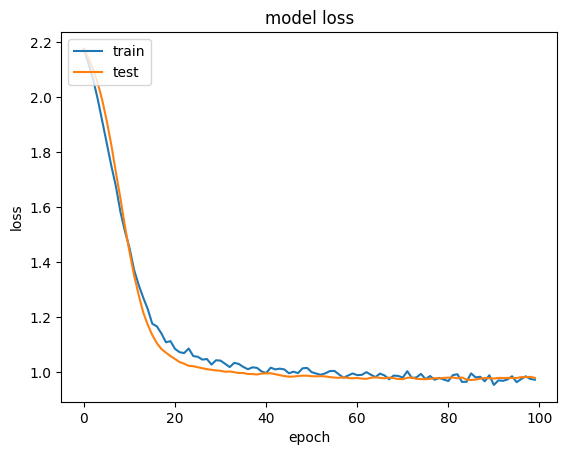

In [144]:
# summarize history for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

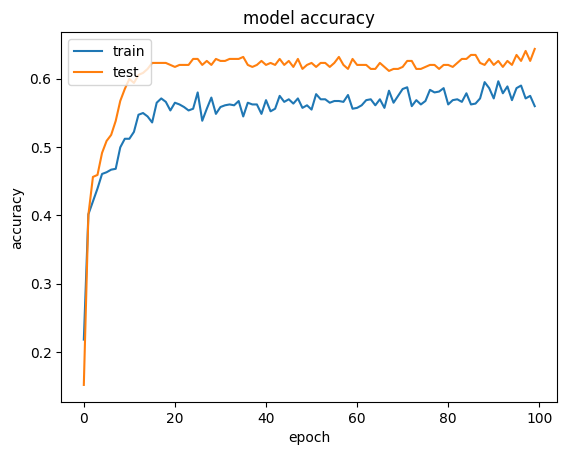

In [145]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Insights

1. Model 2, which includes batch normalization and dropout, shows an improvement in terms of both training and validation loss compared to Model 1. The loss decreased from around 1.28 to 0.9708 on the training set.

2. Model 2 achieved a final training accuracy of around 0.5596 and a validation accuracy of around 0.64. While this is an improvement over Model 1, there might still be room for further enhancement.

3. The introduction of dropout in Model 2 could have contributed to better generalization, as dropout helps prevent overfitting.

4. The training time per epoch for Model 2 might be slightly longer due to the additional computations involved in batch normalization. However, the trade-off is often better convergence.


Part B

Part2.1a-Read the .h5 file and assign to a variable

In [83]:
# Import Libraries
import h5py
file_path = '/content/drive/MyDrive/Python Course/Autonomous_Vehicles_SVHN_single_grey1.h5'


# Open the SVHN .h5 file and assign to variable
AV_SVHN= h5py.File(file_path, 'r')

AV_SVHN

<HDF5 file "Autonomous_Vehicles_SVHN_single_grey1.h5" (mode r)>

Part2.1b-Print all the keys from the .h5 file.

In [84]:
AV_SVHN.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

Part2.1c-Split the data into X_train, X_test, Y_train, Y_test

In [85]:
# Load the training and test set
X_train = AV_SVHN['X_train'][:]
y_train = AV_SVHN['y_train'][:]
X_test = AV_SVHN['X_test'][:]
y_test = AV_SVHN['y_test'][:]

y_train

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

Part2.2a-Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync..

In [86]:
# Print shape of the training and test sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(42000, 32, 32) (42000,)
(18000, 32, 32) (18000,)


Part2.2b-Visualise first 10 images in train data and print its corresponding labels..

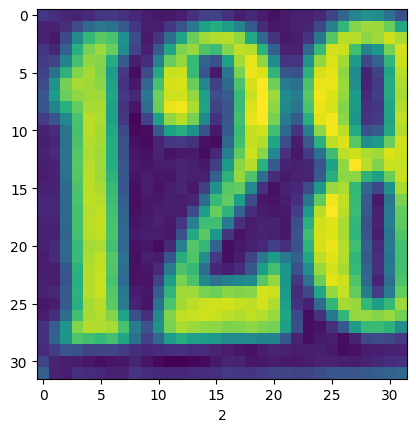

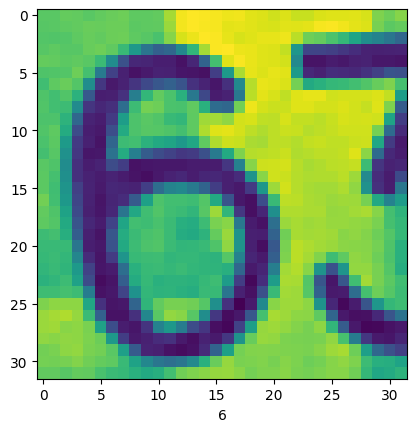

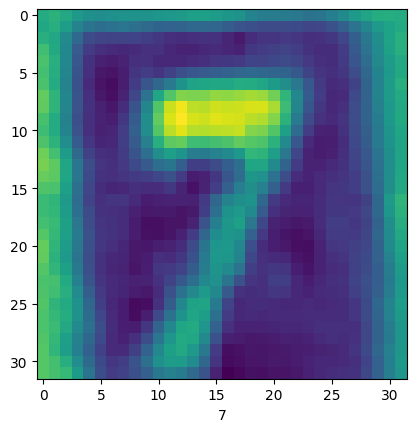

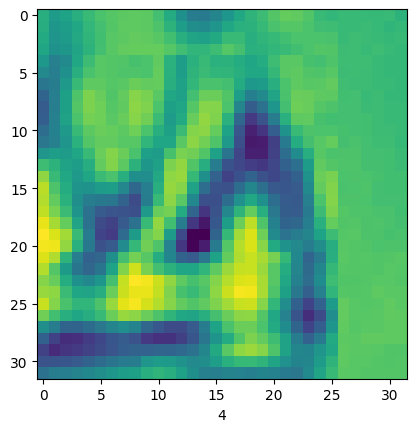

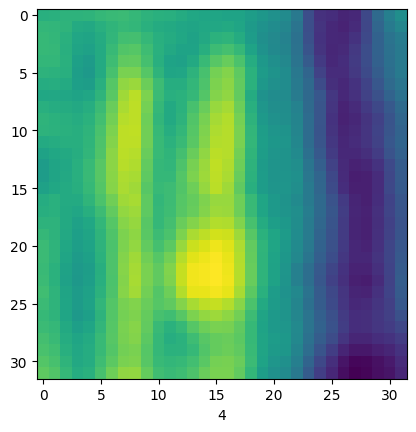

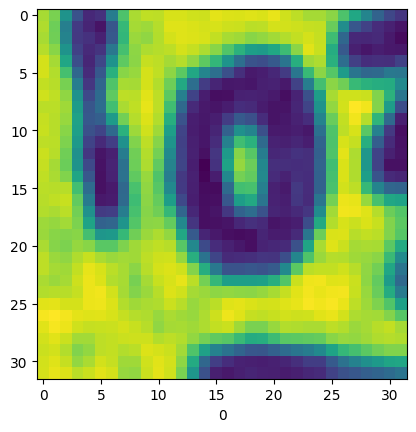

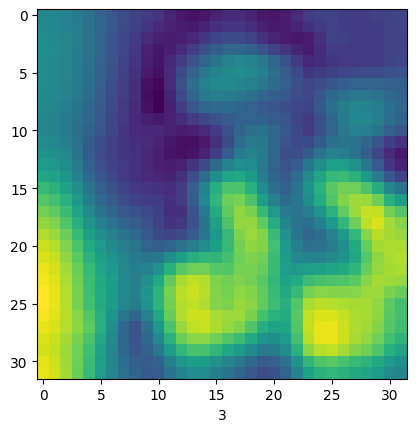

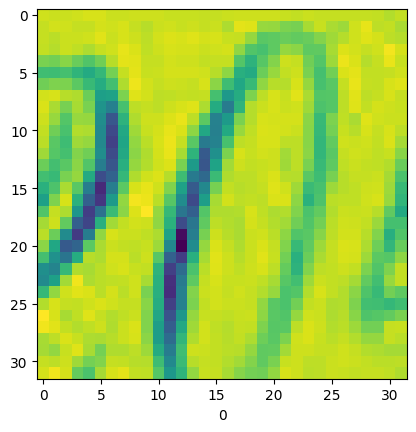

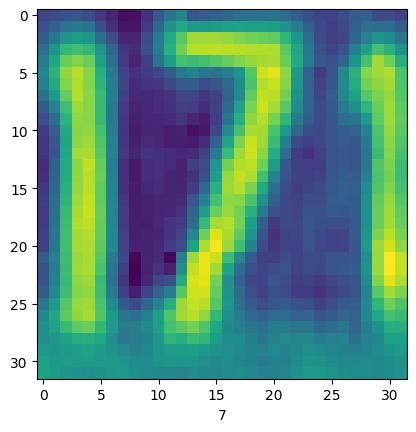

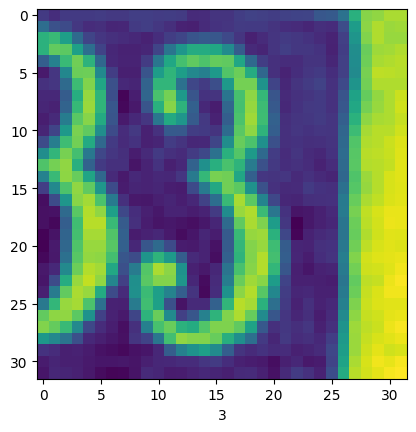

In [87]:
for i in range(10):
    image = X_train[i]
    plt.figure(i)
    plt.imshow(image)
    plt.xlabel(y_train[i])
    plt.show()

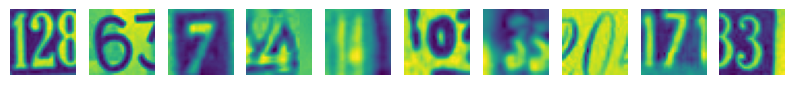

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [88]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

Part2.2c-Reshape all the images with appropriate shape update the data in same variable

In [89]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [90]:
# Reshaping the dataset to flatten them. Reshape the 2D image data into a 1D array

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [91]:
# Check Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (1024,)

First image:
 [33.0704 30.2601 26.852  ... 49.6682 50.853  53.0377]


In [92]:
print("X_train",X_train.shape," X_test", X_test.shape, 'y_train',y_train.shape, 'y_test',y_test.shape)

X_train (42000, 1024)  X_test (18000, 1024) y_train (42000,) y_test (18000,)


Part2.2d-Normalise the images i.e. Normalise the pixel values

In [93]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255
X_test = X_test/255

print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

Max value in X_train: 0.9999
Min value in X_train: 0.0


Part2.2e-Transform Labels into format acceptable by Neural Network

In [94]:
# one hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(42000, 10)
(18000, 10)


Part2.2f-Print total Number of classes in the Dataset

In [95]:
print("Number of classes in y_train:", y_train.shape[1])
print("Number of classes in y_test:", y_test.shape[1])

Number of classes in y_train: 10
Number of classes in y_test: 10


Part2.3a-Design a Neural Network to train a classifier.

In [99]:
#Importing losses and optimizers modules
from tensorflow.keras  import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_2():
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(256, activation='relu', input_shape=(1024, )),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(rate = 0.2),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, activation = 'softmax')
    ])

    #declare adam optimizer with learning rate of 0.0005
    adam = optimizers.Adam(learning_rate=0.0005)

    #compile the model
    model.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics= ['accuracy'])

    return model

# Build the model
model_2 = nn_model_2()
#Print the model summary
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               262400    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_5 (Bat  (None, 32)               

Part2.3b -Train the classifier using previously designed Architecture (Use best suitable parameters)

In [100]:
history_model_2 = model_2.fit(X_train,y_train, epochs=30, validation_split=0.2, batch_size=128, verbose = 1)


Epoch 1/30
263/263 [==============================] - 4s 10ms/step - loss: 2.3448 - accuracy: 0.1024 - val_loss: 2.2982 - val_accuracy: 0.1370
Epoch 2/30
263/263 [==============================] - 2s 8ms/step - loss: 2.1097 - accuracy: 0.2115 - val_loss: 2.0342 - val_accuracy: 0.2756
Epoch 3/30
263/263 [==============================] - 2s 7ms/step - loss: 1.6576 - accuracy: 0.4196 - val_loss: 1.4123 - val_accuracy: 0.5443
Epoch 4/30
263/263 [==============================] - 2s 8ms/step - loss: 1.3946 - accuracy: 0.5320 - val_loss: 1.2585 - val_accuracy: 0.6018
Epoch 5/30
263/263 [==============================] - 2s 8ms/step - loss: 1.2722 - accuracy: 0.5783 - val_loss: 1.1870 - val_accuracy: 0.6099
Epoch 6/30
263/263 [==============================] - 2s 7ms/step - loss: 1.1850 - accuracy: 0.6121 - val_loss: 1.2766 - val_accuracy: 0.5762
Epoch 7/30
263/263 [==============================] - 2s 9ms/step - loss: 1.1221 - accuracy: 0.6351 - val_loss: 1.0313 - val_accuracy: 0.6663
Epoch

Part2.3c-Evaluate performance of the model with appropriate metrics

563/563 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1814
           1       0.79      0.82      0.81      1828
           2       0.90      0.72      0.80      1803
           3       0.71      0.74      0.72      1719
           4       0.83      0.82      0.83      1812
           5       0.70      0.75      0.72      1768
           6       0.69      0.80      0.74      1832
           7       0.82      0.81      0.81      1808
           8       0.72      0.72      0.72      1812
           9       0.82      0.69      0.75      1804

    accuracy                           0.77     18000
   macro avg       0.78      0.77      0.77     18000
weighted avg       0.78      0.77      0.77     18000



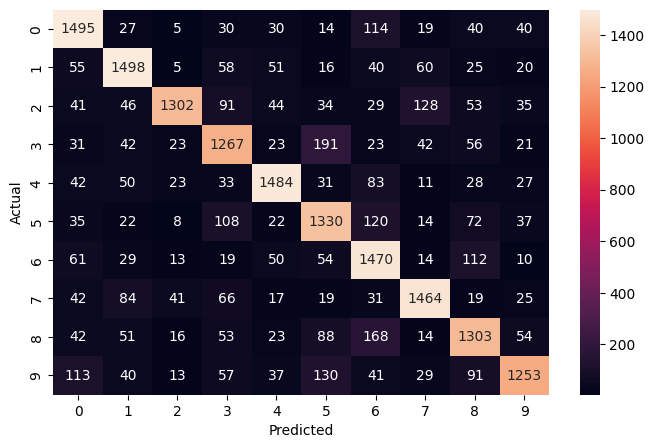

In [101]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Part2.3d-Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write yourobservations on the same

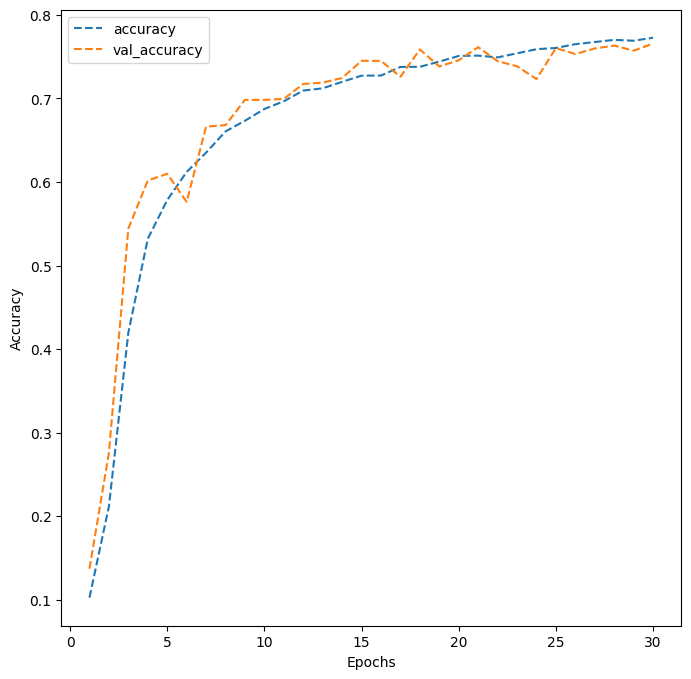

In [102]:
dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

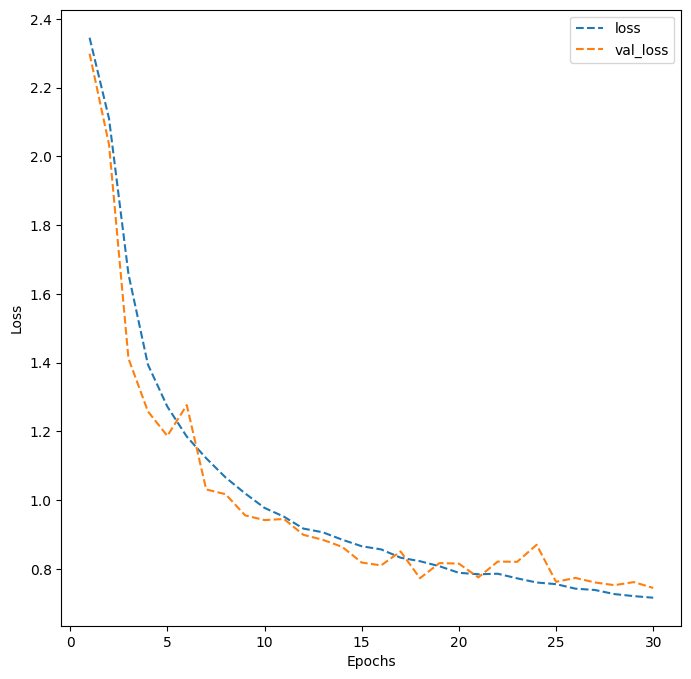

In [103]:
dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['loss'],ls = '--', label = 'loss')
plt.plot(list_ep,dict_hist['val_loss'],ls = '--', label = 'val_loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

Insights

1. The training loss decreases from approximately 2.34 to 0.72, indicating improvement. The training accuracy increases from around 10.24% to 77.27%, showing that the model is learning from the training data.

2. The validation loss decreases from around 2.30 to 0.74, and the validation accuracy increases from approximately 13.70% to 76.57%. This suggests that the model generalizes well to new, unseen data.

3. The model starts with low accuracy and high loss, but these improve over time as the model learns from the data.

4. There might be some fluctuations, but the overall trend is positive.

5. The final validation accuracy is around 76.57%.

6. In this case, both validation loss and accuracy show improvement, indicating that the model is not overfitting the training data.

7. The model seems to perform reasonably well, with good precision and recall for most classes. However, it might be worth looking into classes where precision or recall is comparatively lower to understand potential areas of improvement.